In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# G1 and Metaphase, Cdc14 and Cbf5, Otsu2 data

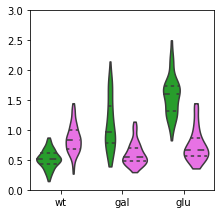

In [2]:
labels = ['CDC14', 'CBF5']
labelList = []
areaList = []
mutantList = []
for label in labels:
    if label == 'CDC14':
        tag = "-GFP"
    else:
        tag = "-mcherry"
    file = open('json_' + label + '_otsu2_data_G1.json')
    fileDict = json.load(file)
    mutants = ['wt', 'gal', 'glu']
    for mutant in mutants:
        areaList.extend(fileDict[mutant])
        mutantList.extend([mutant] * len(fileDict[mutant]))
        labelList.extend([label+tag] * len(fileDict[mutant]))
totalDict = {'area': areaList, 'mutant': mutantList, 'label': labelList}
df = pd.DataFrame.from_dict(totalDict)
ax = sns.violinplot(x='mutant', y='area', data=df, inner='quartile', palette=sns.xkcd_palette(['green', 'light magenta']), cut=0, hue="label", split=False)
ax.set(ylabel='', xlabel='', ylim=(0, 3))
ax.get_legend().set_visible(False)
fig = ax.get_figure()
fig.set_size_inches(3.3, 3.3)
fig.savefig('signal_areas_otsu2.png', bbox_inches='tight', dpi = 2000)